# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [17]:
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo=pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [18]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a bar chart of the top 5 items bought

In [19]:
df=pd.DataFrame(chipo["item_name"].value_counts())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Chicken Bowl to Carnitas Salad
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   50 non-null     int64
dtypes: int64(1)
memory usage: 800.0+ bytes


In [20]:
df.drop(df.tail(45).index,inplace=True)
df

,count
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


Text(0.5, 1.0, 'Most ordered Chipotle items')

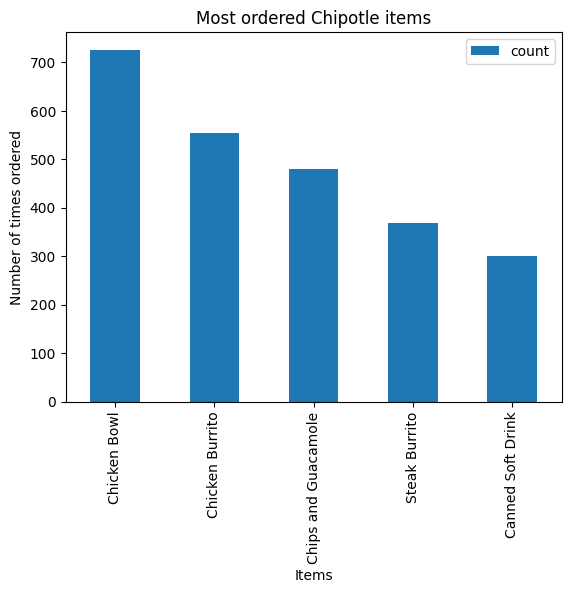

In [21]:
df.plot(kind="bar")
plt.xlabel('Items')
plt.ylabel('Number of times ordered')
plt.title('Most ordered Chipotle items')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [90]:
def dollarremove(x):
    return float(x.replace('$', ''))

chipo['item_price'] = chipo['item_price'].apply(dollarremove)


In [99]:
grp=chipo.groupby('order_id')
price=grp['item_price'].sum()
price=pd.DataFrame(scatter)
price

,item_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


In [101]:
item_per_order=grp['quantity'].sum()
item_per_order=pd.DataFrame(item_per_order)
item_per_order

,quantity
order_id,
1,4
2,2
3,2
4,2
5,2
...,...
1830,2
1831,3
1832,2


In [103]:
scatter=pd.concat([price, item_per_order], axis=1)
scatter

,item_price,quantity
order_id,,
1,11.56,4
2,16.98,2
3,12.67,2
4,21.00,2
5,13.70,2
...,...,...
1830,23.00,2
1831,12.90,3
1832,13.20,2


Text(0.5, 1.0, 'Number of items ordered per order price')

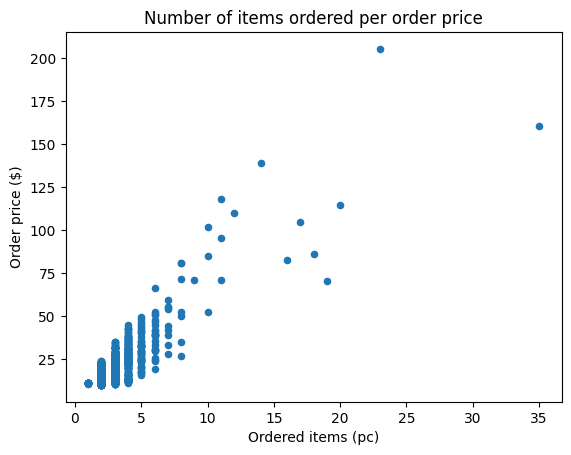

In [111]:
scatter.plot.scatter(x='quantity',
                     y='item_price')
plt.xlabel('Ordered items (pc)')
plt.ylabel('Order price ($)')
plt.title('Number of items ordered per order price')

### Step 7. BONUS: Create a question and a graph to answer your own question.